<a href="https://colab.research.google.com/github/elhamng/MLinChemistry/blob/master/AMD_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas==0.24.2

     |████████████████████████████████| 10.1 MB 2.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.2
    Uninstalling pandas-1.1.2:
      Successfully uninstalled pandas-1.1.2


In [ ]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit

--2020-09-11 09:00:40--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-09-11 09:00:40--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  88.74M   185MB/s    in 0.5s    

2020-09-11 09:00:41 (185 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AFcK03JBwbf1BVDwrznyDQeDTa7HKrodauQEn5DkjODqyLx1-aANXk
Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/solubility-dataset.csv')

In [ ]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility
0,E-1,n-pentane,"InChI=1S/C5H12/c1-3-5-4-2/h3-5H2,1-2H3",OFBQJSOFQDEBGM-UHFFFAOYSA-N,CCCCC,-3.18
1,E-2,cyclopentane,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,RGSFGYAAUTVSQA-UHFFFAOYSA-N,C1CCCC1,-2.64
2,E-3,n-hexane,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",VLKZOEOYAKHREP-UHFFFAOYSA-N,CCCCCC,-3.84
3,E-4,2-methylpentane,"InChI=1S/C6H14/c1-4-5-6(2)3/h6H,4-5H2,1-3H3",AFABGHUZZDYHJO-UHFFFAOYSA-N,CCCC(C)C,-3.74
4,E-5,"2,2-dimethylbutane","InChI=1S/C6H14/c1-5-6(2,3)4/h5H2,1-4H3",HNRMPXKDFBEGFZ-UHFFFAOYSA-N,CCC(C)(C)C,-3.55


The only information we have here is SMILES and InChI representation of molecular formulas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1291 non-null   object 
 1   Name        1291 non-null   object 
 2   InChI       1291 non-null   object 
 3   InChIKey    1291 non-null   object 
 4   SMILES      1291 non-null   object 
 5   Solubility  1291 non-null   float64
dtypes: float64(1), object(5)
memory usage: 60.6+ KB


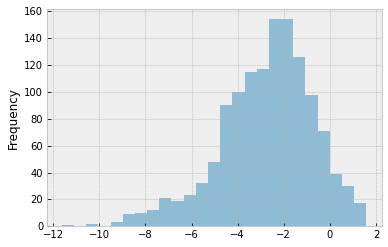

In [ ]:
plt.style.use('bmh')
df['Solubility'].plot.hist(alpha=0.5,bins=25)

This histogram illustrates Solubility distributions. It is moreorless asymetric and has a longer tail towards negetivity.

I employed RDkit to work with MOL representations. RDkit provides an opportunity to transform SMILES to MOL.

In [ ]:
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 


RDkit provides visualization of MOLs with rdkit.Chem.Draw module.


In [ ]:
mols = df['mol'][:10]

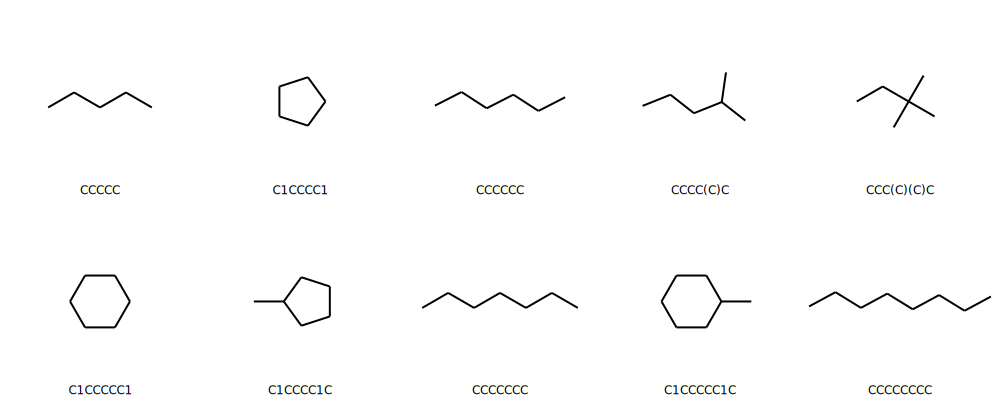

In [ ]:
#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['SMILES'][:10].values))

RDkit provides GetNumAtoms() method, i.e nubmer of all atoms in a molecule, and GetNumHeavyAtoms() method, returns a nubmer of all atoms in a molecule with molecular weight. But before them, we use AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored).



In [ ]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

In [ ]:
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())

In [ ]:
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


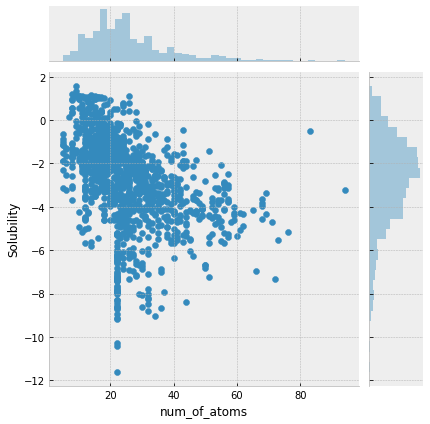

In [ ]:
import seaborn as sns
sns.jointplot(df['num_of_atoms'], df['Solubility'])
plt.show()

This plot shows the connection between number of atoms and targer variable. There is no clear dependency. 

Find the number of most common atoms in molecules, for example C:

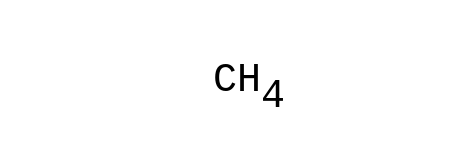

In [ ]:
A= Chem.MolFromSmiles('C')
A

In [ ]:
result_array = []
print(len(df))
for i in range(0,len(df)):
  len_c = len(df['mol'][i].GetSubstructMatches(A))
  result_array = np.append(result_array, [len_c], axis=0)

result_array

1291


array([ 5.,  5.,  6., ..., 20., 14., 10.])

In [ ]:
c_patt = Chem.MolFromSmiles('C')

# Now let's implement GetSubstructMatches() method
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,), (4,))


In [ ]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C', 'O', 'N', 'Cl','PS'], df)

In [ ]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_PS_atoms
0,E-1,n-pentane,"InChI=1S/C5H12/c1-3-5-4-2/h3-5H2,1-2H3",OFBQJSOFQDEBGM-UHFFFAOYSA-N,CCCCC,-3.18,<rdkit.Chem.rdchem.Mol object at 0x7fa1a4785df0>,17,5,5,0,0,0,0
1,E-2,cyclopentane,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,RGSFGYAAUTVSQA-UHFFFAOYSA-N,C1CCCC1,-2.64,<rdkit.Chem.rdchem.Mol object at 0x7fa1a4785e40>,15,5,5,0,0,0,0
2,E-3,n-hexane,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",VLKZOEOYAKHREP-UHFFFAOYSA-N,CCCCCC,-3.84,<rdkit.Chem.rdchem.Mol object at 0x7fa1a4785e90>,20,6,6,0,0,0,0
3,E-4,2-methylpentane,"InChI=1S/C6H14/c1-4-5-6(2)3/h6H,4-5H2,1-3H3",AFABGHUZZDYHJO-UHFFFAOYSA-N,CCCC(C)C,-3.74,<rdkit.Chem.rdchem.Mol object at 0x7fa1a4785ee0>,20,6,6,0,0,0,0
4,E-5,"2,2-dimethylbutane","InChI=1S/C6H14/c1-5-6(2,3)4/h5H2,1-4H3",HNRMPXKDFBEGFZ-UHFFFAOYSA-N,CCC(C)(C)C,-3.55,<rdkit.Chem.rdchem.Mol object at 0x7fa1a4785f30>,20,6,6,0,0,0,0


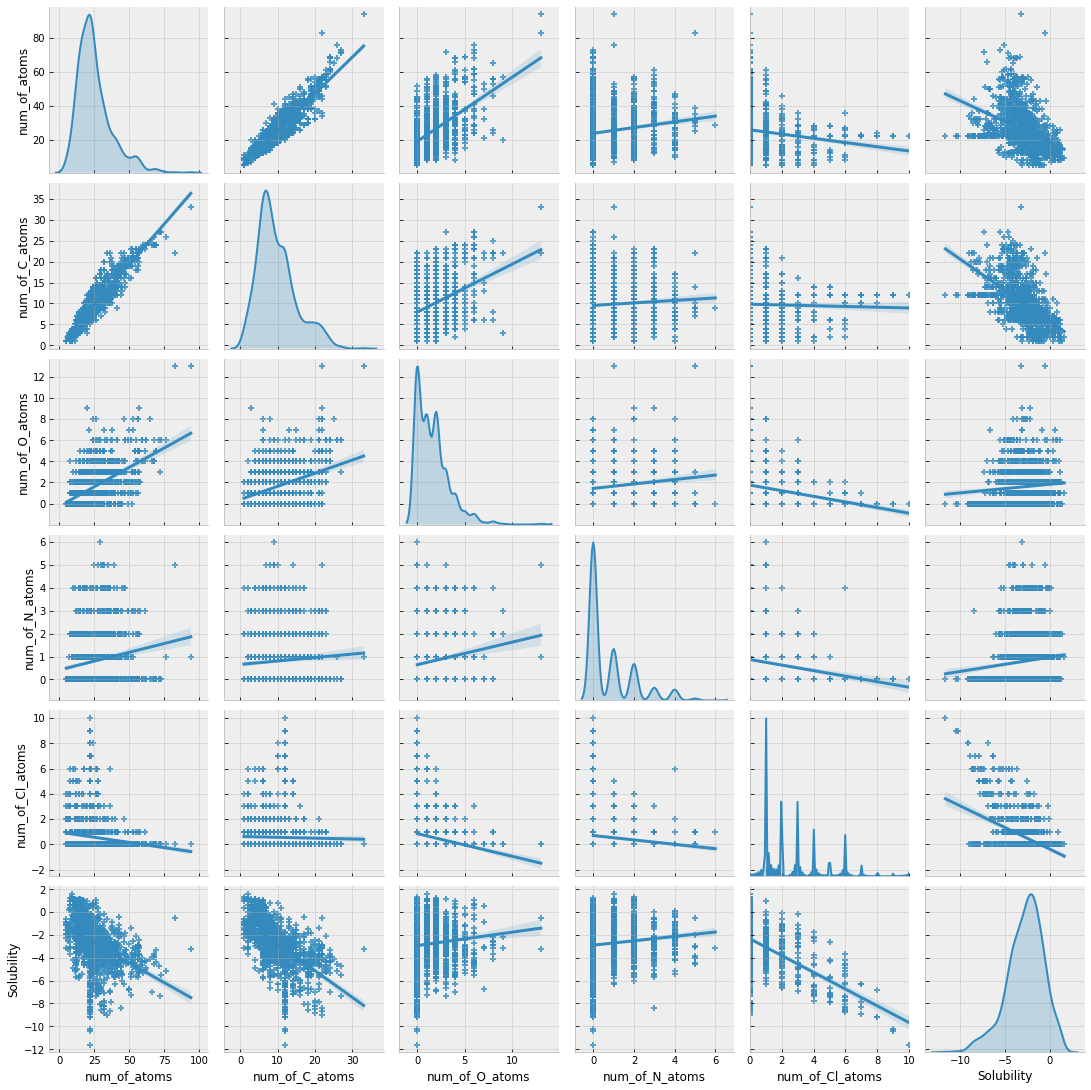

In [ ]:
sns.pairplot(df[['num_of_atoms','num_of_C_atoms','num_of_O_atoms', 'num_of_N_atoms','num_of_Cl_atoms', 'Solubility']], diag_kind='kde', kind='reg', markers='+')
plt.show()

Looking at the figures, there are linear dependence of solibility on numbers of particular atoms. But the distribution is not totally normal. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1291 non-null   object 
 1   Name                1291 non-null   object 
 2   InChI               1291 non-null   object 
 3   InChIKey            1291 non-null   object 
 4   SMILES              1291 non-null   object 
 5   Solubility          1291 non-null   float64
 6   mol                 1291 non-null   object 
 7   num_of_atoms        1291 non-null   int64  
 8   num_of_heavy_atoms  1291 non-null   int64  
 9   num_of_C_atoms      1291 non-null   int64  
 10  num_of_O_atoms      1291 non-null   int64  
 11  num_of_N_atoms      1291 non-null   int64  
 12  num_of_Cl_atoms     1291 non-null   int64  
 13  num_of_PS_atoms     1291 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 141.3+ KB


Training and Testing Data

In [ ]:
train_df = df[['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'num_of_PS_atoms']]
target = df['Solubility'].values

** I Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.3, random_state=101)

Training the Model
** Import LinearRegression from sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm and  Train/fit lm on the training data.

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.04875409 -0.52189701  0.1515902   0.77177747  0.62108261 -0.14087481
 -0.57705317]


Predicting Test Data
 let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

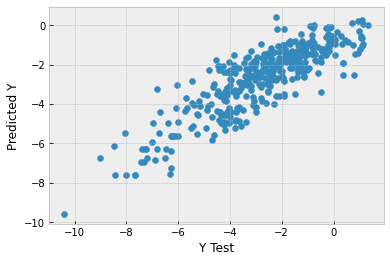

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**



In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8359450945641925
MSE: 1.136971577090864
RMSE: 1.0662886931271773


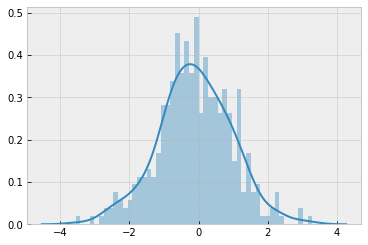

In [ ]:
sns.distplot((y_test-predictions),bins=50);

2- Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
train_df_r = df[['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'num_of_PS_atoms']]
target_r = df['Solubility'].values

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(train_df_r, target_r, test_size=0.30, random_state=101)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)

    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('Solubility')
    plt.title("MAE {}, MSE {}".format(round(mae, 4), round(mse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))

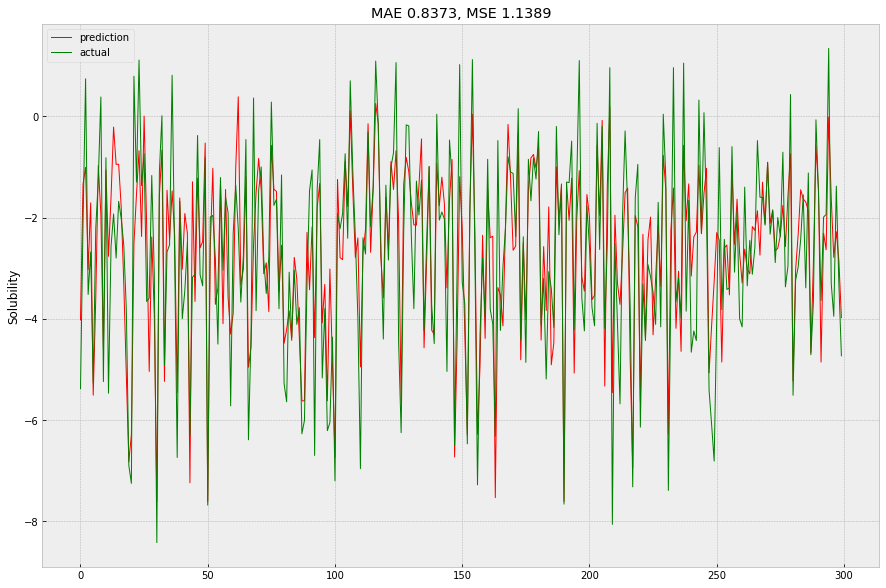

MAE score: 0.8373
MSE score: 1.1389


In [ ]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train_r, y_train_r)
#Evaluate results
evaluation(ridge, X_test_r, y_test_r)

I add LinearRegression for comparison 

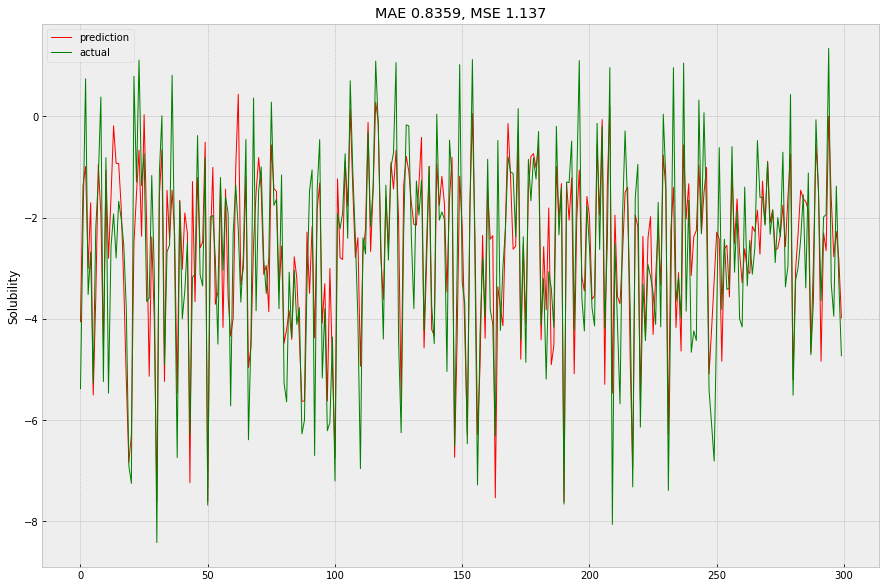

MAE score: 0.8359
MSE score: 1.137


In [ ]:
evaluation(lm, X_test, y_test)

rdkit.Chem.Descriptors provides a number of general molecular descriptors that can also be used to featurize a molecule. 

Using this package we can add some useful features to our model:

rdkit.Chem.Descriptors.TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms;

rdkit.Chem.Descriptors.ExactMolWt() - exact molecural weight;
rdkit.Chem.Descriptors.NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
rdkit.Chem.Descriptors.NumHeteroatoms() - general number of non-carbon atoms.

In [ ]:
from rdkit.Chem import Descriptors
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))


In [ ]:
len(df)

1291

Let's explore the correlation of these features across the data set

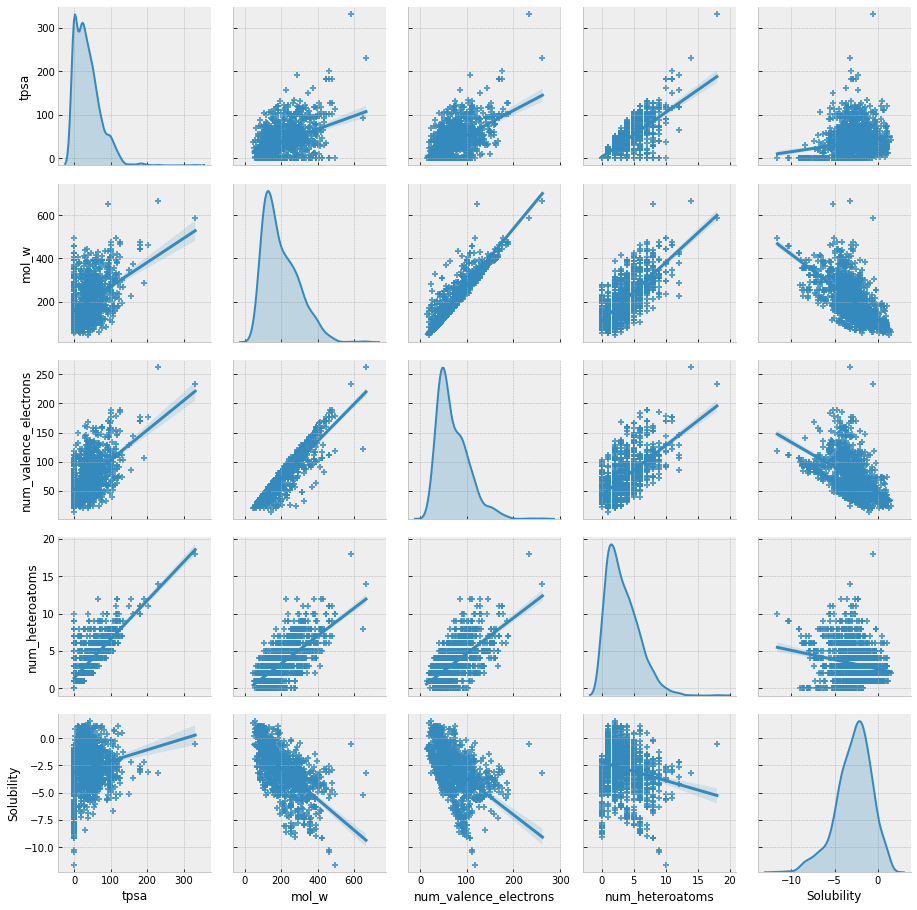

In [ ]:
sns.pairplot(df[['tpsa','mol_w','num_valence_electrons', 'num_heteroatoms', 'Solubility']], diag_kind='kde', kind='reg', markers='+')
plt.show()

Let's check the improvement of the model perfomance with new features.

In [ ]:
train_df_r_2 = df[['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'num_of_PS_atoms','tpsa','mol_w','num_valence_electrons', 'num_heteroatoms']]
target_r_2 = df['Solubility'].values

In [ ]:
X_train_r_2, X_test_r_2, y_train_r_2, y_test_r_2 = train_test_split(train_df_r_2, target_r_2, test_size=0.30, random_state=101)

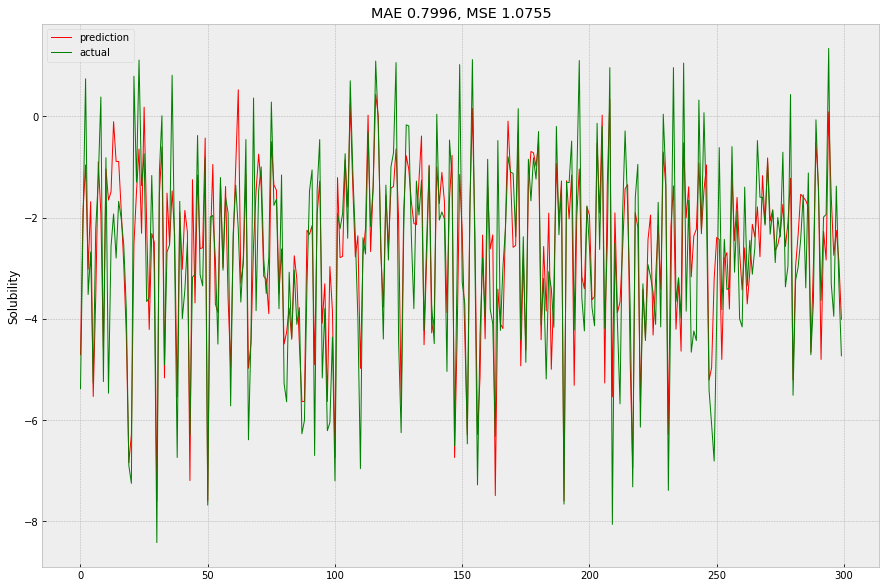

MAE score: 0.7996
MSE score: 1.0755


In [ ]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train_r_2, y_train_r_2)
#Evaluate results
evaluation(ridge, X_test_r_2, y_test_r_2)

Let's check the improvement of the model perfomance with cutting the tail of Solubility distribution in the negetive side.

In [ ]:
df = df[df.Solubility > -7]

In [ ]:
len(df)

1238

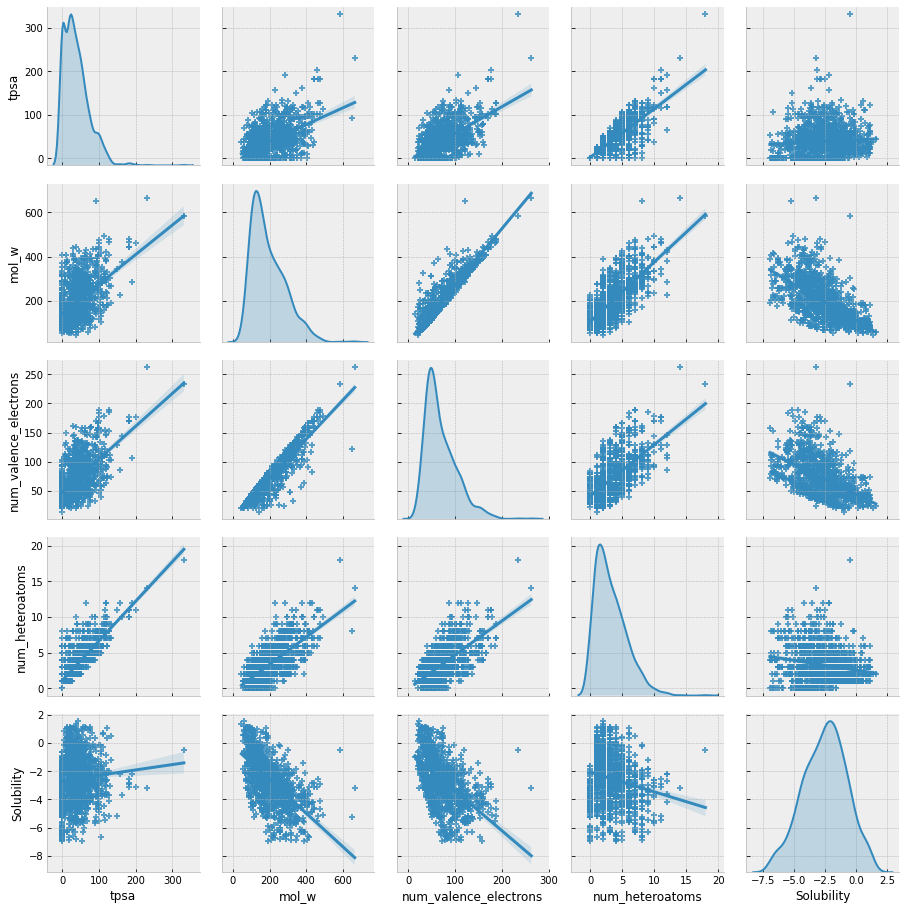

In [ ]:
sns.pairplot(df[['tpsa','mol_w','num_valence_electrons', 'num_heteroatoms', 'Solubility']], diag_kind='kde', kind='reg', markers='+')
plt.show()

In [ ]:
train_df_r_3 = df[['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'num_of_PS_atoms','tpsa','mol_w','num_valence_electrons', 'num_heteroatoms']]
target_r_3 = df['Solubility'].values

In [ ]:
X_train_r_3, X_test_r_3, y_train_r_3, y_test_r_3 = train_test_split(train_df_r_3, target_r_3, test_size=0.30, random_state=101)

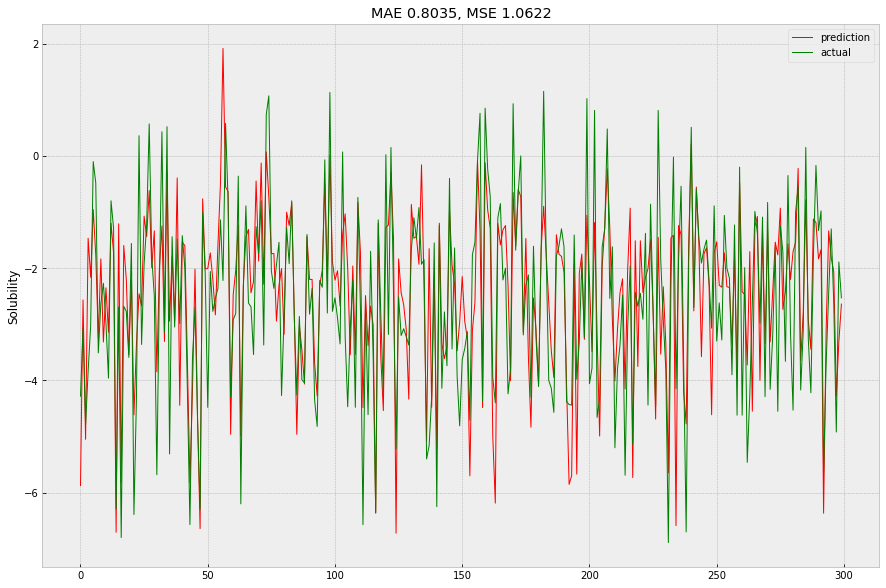

MAE score: 0.8035
MSE score: 1.0622


In [ ]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train_r_3, y_train_r_3)
#Evaluate results
evaluation(ridge, X_test_r_3, y_test_r_3)